# Maximum Likelihood and Maximum A Posterior

* We looked at the regularization term as a *penalty* term in the objective function.  There is another way to interpret the regularization term as well.  Specifically, there is a *Bayesian* interpretation. 

\begin{eqnarray}
\min E^{\ast}(\mathbf{w}) &=& \max -E^{\ast}(\mathbf{w})\\
& =& \max \exp \left\{ -E^{\ast}(\mathbf{w})\right\}\\
&=& \max \exp \left\{ -\frac{1}{2}\sum_{n=1}^N \left( y(x_n, \mathbf{w}) - t_n \right)^2 - \frac{\lambda}{2}\left\| \mathbf{w} \right\|^2_2 \right\}\\
&=& \max \exp \left\{ -\frac{1}{2}\sum_{n=1}^N \left( y(x_n, \mathbf{w}) - t_n \right)^2 \right\}\exp\left\{-\frac{1}{2}\lambda\left\| \mathbf{w} \right\|^2_2\right\}\\
&=& \max \prod_{n=1}^N \exp \left\{ -\frac{1}{2} \left( y(x_n, \mathbf{w}) - t_n \right)^2 \right\}\exp\left\{-\frac{1}{2}\lambda\left\| \mathbf{w} \right\|^2_2\right\}
\end{eqnarray}

* So, this is a maximization of the *data likelihood* with a *prior*: $p(\mathbf{X}|\mathbf{w})p(\mathbf{w})$

* *Method of Maximum Likelihood:*
    * A *data likelihood* is how likely the data is given the parameter set
    * So, if we want to maximize how likely the data is to have come from the model we fit, we should find the parameters that maximize the likelihood
    * A common trick to maximizing the likelihood is to maximize the log likelihood.  Often makes the math much easier.  *Why can we maximize the log likelihood instead of the likelihood and still get the same answer?*
    * Consider: $\max \ln \exp \left\{ -\frac{1}{2}\left(y(x_n, \mathbf{w}) - t_n\right)^2\right\}$ We go back to our original objective. 


* *Method of Maximum A Posteriori (MAP):*
    * Bayes Rule: $p(Y|X) = \frac{p(X|Y)p(Y)}{p(X)}$
    * Consider: $p(\mathbf{w}|\mathscr{D}) = \frac{p(\mathscr{D}|\mathbf{w})p(\mathbf{w})}{p(\mathscr{D})}$, i.e., posterior $\propto$ likelihood $\times$ prior

## The Gaussian Distribution:
* Consider a univariate Gaussian distribution:
\begin{equation}
\mathscr{N}(x|\mu, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}}\exp\left\{ -\frac{1}{2}\frac{(x-\mu)^2}{\sigma^2} \right\}
\end{equation}
* $\sigma^2$ is the variance OR $\frac{1}{\sigma^2}$ is the *precision*
* So, as $\lambda$ gets big, variance gets smaller/tighter.  As $\lambda$ gets small, variance gets larger/wider.
* The Gaussian distribution is also called the *Normal* distribution. 
* We will often write $N(x|\mu, \sigma^2)$ to refer to a Gaussian with mean $\mu$ and variance $\sigma^2$.
* *What is the multi-variate Gaussian distribution?* 

* What is the expected value of $x$ for the Gaussian distribution?
\begin{eqnarray}
E[x] &=& \int x p(x) dx \\
     &=& \int x \frac{1}{\sqrt{2\pi \sigma^2}}\exp\left\{ -\frac{1}{2}\frac{(x-\mu)^2}{\sigma^2} \right\} dx
\end{eqnarray}
* *Change of variables:*  Let
\begin{eqnarray}
y &=& \frac{x-\mu}{\sigma} \rightarrow x = \sigma y + \mu\\
dy &=& \frac{1}{\sigma} dx \rightarrow dx = \sigma dy
\end{eqnarray}
* Plugging this into the expectation: 
\begin{eqnarray}
E[x] &=& \int \left(\sigma y + \mu  \right)\frac{1}{\sqrt{2\pi}\sigma} \exp\left\{ - \frac{1}{2} y^2 \right\} \sigma dy \\
&=& \int \frac{\sigma y}{\sqrt{2\pi}} \exp\left\{ - \frac{1}{2} y^2 \right\} dy + \int \frac{\mu}{\sqrt{2\pi}} \exp\left\{ - \frac{1}{2} y^2 \right\} dy 
\end{eqnarray}
* The first term is an odd function: $f(-y) = -f(y)$  So, $E[x] = 0 + \mu = \mu$


## Maximum Likelihood vs. Maximum A Posteriori (MAP)

* Lets look at this in terms of binary variables, e.g., Flipping a coin:  $X =1$ is heads, $X=0$ is tails
* Let $\mu$ be the probability of heads.  If we know $\mu$, then: $P(x = 1 |\mu) = \mu$ and $P(x = 0|\mu) = 1-\mu$
\begin{eqnarray}
P(x|\mu) = \mu^x(1-\mu)^{1-x} = \left\{\begin{array}{c c}\mu & \text{ if } x=1 \\ 1-\mu & \text{ if } x = 0 \end{array}\right.
\end{eqnarray}

* This is called the *Bernoulli* distribution.  The mean and variance of a Bernoulli distribution is: 
\begin{equation}
E[x] = \mu
\end{equation}
\begin{equation}
E\left[(x-\mu)^2\right] = \mu(1-\mu)
\end{equation}
* So, suppose we conducted many Bernoulli trials (e.g., coin flips) and we want to estimate $\mu$

### Method: Maximum Likelihood
\begin{eqnarray}
p(\mathscr{D}|\mu) &=& \prod_{n=1}^N p(x_n|\mu) \\
&=& \prod_{n=1}^N \mu^{x_n}(1-\mu)^{1-x_n}
\end{eqnarray}

* Maximize : (*What trick should we use?*)
\begin{eqnarray}
\mathscr{L} = \sum_{n=1}^N x_n \ln \mu + (1-x_n)\ln(1-\mu)
\end{eqnarray}

\begin{eqnarray}
\frac{\partial \mathscr{L}}{\partial \mu} =  0 &=& \frac{1}{\mu}\sum_{n=1}^N x_n - \frac{1}{1-\mu }\sum_{n=1}^N (1 - x_n)\\
0 &=& \frac{(1-\mu) \sum_{n=1}^N x_n - \mu \sum_{n=1}^N (1- x_n)}{\mu(1-\mu)}\\
0 &=& \sum_{n=1}^N x_n - \mu \sum_{n=1}^N x_n - \mu \sum_{n=1}^N 1 + \mu \sum_{n=1}^N x_n\\
0 &=& \sum_{n=1}^N x_n - \mu N\\
\mu &=& \frac{1}{N}\sum_{n=1}^N x_n = \frac{m}{N}
\end{eqnarray}
where $m$ is the number of successful trials. 

* So, if we flip a coin 1 time and get heads, then $\mu = 1$ and probability of getting tails is 0.  *Would you believe that? We need a prior!*

### Method: Maximum A Posteriori: 

* Look at several independent trials.  Consider N = 3 and m = 2 (N is number of trials, m is number of successes) and look at all ways to get 2 H and 1 T: 
     * H H T  $\rightarrow \mu \mu (1-\mu) = \mu^2(1-\mu)$
     * H T H  $\rightarrow \mu  (1-\mu) \mu  = \mu^2(1-\mu)$
     * T H H $\rightarrow (1-\mu) \mu   \mu  = \mu^2(1-\mu)$

* $\left(\begin{array}{c} 3 \\ 2 \end{array}\right) \mu^2(1-\mu) \rightarrow \left(\begin{array}{c} N \\ m \end{array}\right) \mu^m(1-\mu)^{N-m} = \frac{N!}{(N-m)!m!}\mu^m(1-\mu)^{N-m} $
* This is the Binomial Distribution, gives the probability of $m$ observations of $x=1$ out of N independent trails
* So, what we saw is that we need a prior.  We want to incorporate our prior belief. Let us place a prior on $\mu$
\begin{equation}
Beta(\mu|a,b) = \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)}\mu^{a-1}(1-\mu)^{b-1}
\end{equation}
\begin{equation}
E[\mu] = \frac{a}{a + b}
\end{equation}
\begin{equation}
Var[\mu] = \frac{ab}{(a+b)^2(a+b+1)}
\end{equation}
* Note: $\Gamma(x) = \int_0^\infty u^{x-1}e^{-u} du$ and when $x$ is an integer, then it simplifys to $x!$
* Calculation of the posterior, Take $N = m + l$ observations:
\begin{eqnarray}
p(\mu | m, l, a, b) &\propto& Bin(m,l|\mu)Beta(\mu|a,b) \\
&\propto& \mu^m(1-\mu)^l\mu^{a-1}(1-\mu)^{b-1}\\
&=& \mu^{m+a-1}(1-\mu)^{l+b-1}
\end{eqnarray}
* What does this look like?  Beta: $a \leftarrow m+a$, $b \leftarrow l+b$
* So, what's the posterior? 
\begin{equation}
p(\mu | m, l, a, b) = \frac{\Gamma(m+a+l+b)}{\Gamma(m+a)\Gamma(l+b)}\mu^{m+a-1}(1-\mu)^{l+b-1}
\end{equation}
* *Conjugate Prior Relationship:* When the posterior is the same form as the prior
* Now we can maximize the (log of the) posterior: 
\begin{eqnarray}
\max_\mu (m+a-1) \ln \mu + (l+b-1) \ln (1-\mu)
\end{eqnarray}
\begin{eqnarray}
\frac{\partial \mathscr{L}}{\partial \mu} =  0&=& \frac{m + a -1}{\mu} - \frac{l + b - 1}{1-\mu}\\
&=& (1-\mu)(m+a-1) - \mu(l+b-1)\\
&=& (m+a-1) - \mu(m+a-1) - \mu(l+b-1)\\
\mu &=& \frac{m+a-1}{m+a+l+b-2}
\end{eqnarray}
* This is the MAP solution.  *So, what happens now when you flip one heads, two heads, etc.?*
* Discuss online updating of the prior.  Eventually the data takes over the prior. 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math 
%matplotlib inline   

def plotBeta(a=2,b=2):
	'''plotBeta(a=1,b=1): Plot plot beta distribution with parameters a and b'''
	xrange = np.arange(0,1,0.001)  #get equally spaced points in the xrange
	normconst = math.gamma(a+b)/(math.gamma(a)*math.gamma(b))
	beta = normconst*xrange**(a-1)*(1-xrange)**(b-1)
	fig = plt.figure()
	p1 = plt.plot(xrange,beta, 'g')
	plt.show()


#Beta Distribution
plotBeta(2,4);

trueMu = 0.5
numFlips = 10
priorA = 2
priorB = 2
flipResult = []
for flip in range(numFlips):
    flipResult.append(np.random.binomial(1,trueMu,1)[0])
    print(flipResult)
    print('Frequentist/Maximum Likelihood Probability of Heads:' + str(sum(flipResult)/len(flipResult)))
    print('Bayesian/MAP Probability of Heads:' + str((sum(flipResult)+priorA-1)/(len(flipResult)+priorA+priorB-2)))
    input("Hit enter to continue...\n")

Instead of printing the results, let's save and plot them.

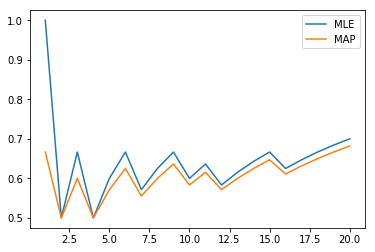

In [41]:
mleMean = []
mapMean = []
numFlips = 20
flipResult = []

for flip in range(numFlips):
    flipResult.append(np.random.binomial(1,trueMu,1)[0])
    mleMean.append(sum(flipResult)/len(flipResult))
    mapMean.append((sum(flipResult)+priorA-1)/(len(flipResult)+priorA+priorB-2))

plt.plot(np.arange(numFlips)+1, mleMean)
plt.plot(np.arange(numFlips)+1, mapMean)
plt.legend(['MLE', 'MAP'])

Whoops, I think I may have done my homework wrong if th MAP of the mean is not as smooth as I thought it would be. However, keep in mind that we are working with two different examples. The prior in this one is a beta distribution and the prior on the homwork is a Gaussian distribution.